In [2]:
from hyper import *
from alignment import *
from datasets.preprecossing import *
from core import *
from datasets.loading import *
from datasets.hc_dataset import *
from datasets.balance_dataset import *
from utils.linkage import *
from model.balancehc import balancehc

from utils.poincare import *
import scib
import shutil



In [ ]:
datas =sc.read_h5ad('./datas/111/BRCA_GSE110686.h5ad')
datas

In [ ]:
datas = datas[datas.obs[datas.obs['Celltype..major.lineage.'] =='CD4Tconv'].index]
datas.obs

In [ ]:
datas.to_df().index.tolist()

In [ ]:
genes.index.tolist()

In [ ]:
meta_list2 = datas.obs['Celltype..minor.lineage.'][genes.index.tolist()].tolist()
meta_list2

In [ ]:
meta_list1 = datas.obs['Celltype..major.lineage.'][genes.index.tolist()].tolist()
meta_list1

In [ ]:
genes = pd.read_csv('./datas/111/BRCA_GSE110686_marker.csv',index_col=0)
genes

In [ ]:
adata1.obs

In [ ]:
genes = pd.merge(genes,t,left_index=True,right_index=True)
genes

In [ ]:
genes

In [ ]:
genes=genes.T[t.index.tolist()].T
genes

In [ ]:
t

In [ ]:
t= pd.get_dummies(adata1.obs, columns=['celltype'])
t=t.drop('celltype1',axis=1)
t


In [ ]:
t= np.array(genes)
t

In [ ]:
genes

In [ ]:
unique_rows = np.unique(t, axis=0)
unique_rows.shape

In [ ]:
adata1.obs['leiden'].unique()

In [5]:
meta_list1 = np.load(folder_path1+'meta_list.npy')
adata1 = sc.read_h5ad(folder_path1+"save.h5ad")
params = torch.load((folder_path1+'model4.pth'), map_location=torch.device('cpu'))
model = HypHC(44, 2, 5e-2, 5e-2 ,0.999)

model.load_state_dict(params, strict=False)

<All keys matched successfully>

In [ ]:
adata1.write_h5ad(folder_path1+"save.h5ad")
np.save(folder_path1+'meta_list.npy',np.array(meta_list1))

In [ ]:
celltypes = []
for i in genes.values:
    for j in range(len(unique_rows)):
        if((i == unique_rows[j]).all()):
            celltypes.append(str(j))
print(celltypes)

In [ ]:
len(celltypes)

In [ ]:
adata1 = sc.AnnData(genes)
adata1

In [ ]:
adata1.obs['leiden'] = celltypes
adata1.obs

In [ ]:
adata1.obs['celltype'] = meta_list2
adata1.obs

In [ ]:
adata1.obs

In [ ]:
adata1.obs['celltype1'] = meta_list1
adata1.obs

In [ ]:
adata1 = adata1[adata1.obs[adata1.obs['celltype1'] =='CD4Tconv'].index]
adata1

In [4]:
cell_path1 = './datas/111/CHOL_GSE142784.h5ad'
folder_path1 = './datas/miss/1/'
radius1 = 0
c1 =0
epoches1 =  50
epoches2 =  10
contin = False
resolution=2
method='average'
alignment=1
n_pca=50
meta_col = 'Celltype..major.lineage.'
mst = False


In [5]:
cell_path1

'./datas/111/CHOL_GSE142784.h5ad'

In [6]:
data_path=folder_path1+'datas.data'
start=1
end=50
label=0
epoches1=10
epoches2=10
model_path=None
model_path2=None
save_path='./', 
mst = False,
rotate = True


In [ ]:
adata1 = sc.read_h5ad(folder_path1+ 'adata.h5ad')

In [ ]:
adata1

In [ ]:
sc.pp.highly_variable_genes(
    adata1,
    min_mean=0.0125,
    max_mean=3,
    min_disp=0.5,
    n_top_genes=2000
)
adata1._inplace_subset_var(adata1.var['highly_variable'])


In [ ]:



preprocessing_cluster(adata1,N_pcs=10,resolution=5)

inter_gene = sort_data(adata1,adata1)

tmp1 = calculate_cluster_centroid_for_genes(adata1,inter_gene,folder_path1) 


meta_list1 = calculate_cluster_celltype(adata1);
calculate_meta_ori(folder_path1,adata1);

In [ ]:
sc.pp.neighbors(adata1,
                n_neighbors=30,
                random_state=1234,
                use_rep='X'
                )
sc.tl.diffmap(adata1,random_state=1234)
sc.tl.umap(adata1,random_state=1234)


In [ ]:
sc.tl.leiden(adata1,random_state=1234,resolution = 9)
sc.tl.paga(adata1, groups='leiden')

In [ ]:
inter_gene = adata1.var.index.tolist()
tmp1 = calculate_cluster_centroid_for_genes(adata1,inter_gene,folder_path1,X_dimension='X') 
meta_list1 = calculate_cluster_celltype(adata1);

In [ ]:
adata1

In [ ]:
meta_list1

In [ ]:
sc.pp.filter_genes(adata1, min_cells=3)
adata1

In [ ]:
adata1.obs.groupby('leiden').describe()

In [ ]:
adata1

In [ ]:
len(meta_list1)

In [ ]:
def add_meta(now,meta_list,merge):
    if(int(now.name)<len(meta_list)):
        now.name= now.name +'_'+ meta_list[int(now.name)];
    merge.append(now)
    for i in now.son:
        add_meta(i,meta_list,merge)
def remove_meta(now):
    if(len(now.name.split('_')) >1):
        now.name = now.name.split('_')[0]
    for i in now.son:
        remove_meta(i)

In [6]:
add_meta

<function core.add_meta(now, meta_list, merge)>

In [ ]:
tmp1.shape[1]+1

In [ ]:
adata1.var

In [27]:
np.random.seed(1234)
torch.manual_seed(1234)
x, y_true, similarities = load_data(data_path,start,637,label)
print("{} length:{}".format(data_path,len(y_true)));
dataset = HCDataset(x, y_true, similarities, num_samples=-1)
dataloader = data.DataLoader(dataset, batch_size=32, shuffle=True, pin_memory=True)
model = HypHC(dataset.n_nodes, 2, 5e-2, 5e-2 ,0.999)

# model.to("cpu")
Optimizer = getattr(optim, 'RAdam')
optimizer = Optimizer(model.parameters(),0.0005)
train(model,dataloader,optimizer,similarities,100);


./datas/miss/1/datas.data length:44
Generating all pairs 13244


	 Epoch 0 | average train loss: 0.949100
Optimization finished.
	 Epoch 1 | average train loss: 0.893398
Optimization finished.
	 Epoch 2 | average train loss: 0.886148
Optimization finished.
	 Epoch 3 | average train loss: 0.883789
Optimization finished.
	 Epoch 4 | average train loss: 0.881823
Optimization finished.
	 Epoch 5 | average train loss: 0.879715
Optimization finished.
	 Epoch 6 | average train loss: 0.879312
Optimization finished.
	 Epoch 7 | average train loss: 0.879304
Optimization finished.
	 Epoch 8 | average train loss: 0.879123
Optimization finished.
	 Epoch 9 | average train loss: 0.879063
Optimization finished.
	 Epoch 10 | average train loss: 0.879035
Optimization finished.
	 Epoch 11 | average train loss: 0.878968
Optimization finished.
	 Epoch 12 | average train loss: 0.878934
Optimization finished.
	 Epoch 13 | average train loss: 0.878900
Optimization finished.
	 Epoch 14 | average train loss: 0.878853
Optimization finished.
	 Epoch 15 | average train loss: 0.

In [ ]:
torch.save(model.state_dict(),folder_path1+'model4.pth');


In [7]:
x=[0 for i in range(44)]

In [28]:
model.eval()

sim_fn = lambda x, y: torch.sum(x * y, dim=-1)
n=len(x);
leaves_embeddings = model.normalize_embeddings(model.embeddings.weight.data)
leaves_embeddings = project(leaves_embeddings).detach().cpu()
ijs = sl_np_mst_ij(leaves_embeddings,sim_fn)
uf = UnionFind(n)
uf.merge(ijs)

tree = nx.DiGraph()
for i, j in enumerate(uf.tree()[:-1]):
    if(j!=-1):
        tree.add_edge(j, i)

n = len(leaves_embeddings)
embeddings = complete_tree(tree, leaves_embeddings)

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/utils/mst.py:4: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/utils/mst.py:10: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addi

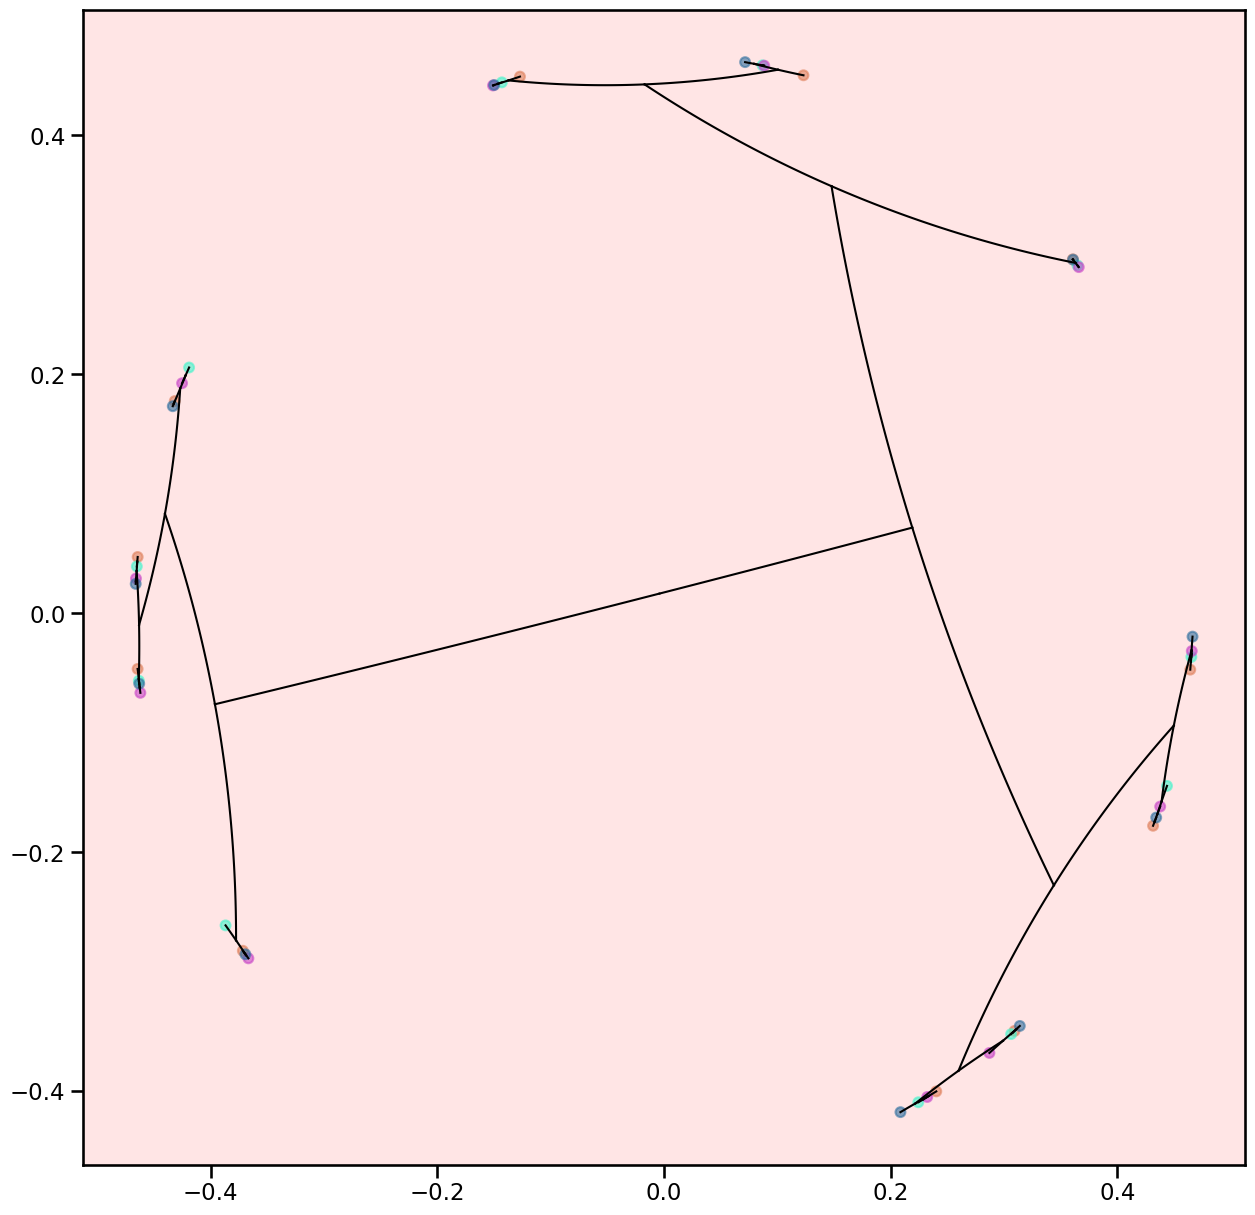

In [30]:
colors = get_colors(meta_list1, 1234)
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
circle = plt.Circle((0, 0), 1.0, color='r', alpha=0.1)
ax.add_artist(circle)
ax.scatter(embeddings[:n, 0], embeddings[:n, 1], c=colors, s=50, alpha=0.6)
# ax.scatter(embeddings[n:,0],embeddings[n:,1],color ='black',s=20,alpha=0.6)
for n1, n2 in tree.edges():
    x1 = embeddings[n1];
    x2 = embeddings[n2]
    plot_geodesic(x1,x2,ax)

In [31]:

nodes1 = [node(name=str(i),son=[]) for i in range(len(uf.tree()))]
for i in range(n):
    nodes1[i].subson=[i];
for i,j in enumerate(uf.tree()):
    if(j!=-1):
        nodes1[j].son.append(nodes1[i])
    nodes1[i].value=torch.tensor(embeddings[i]);
    nodes1[i].hyper=torch.tensor(embeddings[i])
root = nodes1[-1];

In [32]:
n

44

In [33]:
def rotate(nodes,embeddings,epoches2):
    deep_search_tree(root,0,[],root)
    result = []
    distances = []
    for i in nodes:
        if(int(i)>=n):
            if(int(i.son[0]) <n and int(i.son[1])<n ):
                for i1,j1 in itertools.combinations(i.subson,2):
                    for j in i.rest(n):
                        result.append([[i1,j1],j,int(i),1,int(j)])
                    
    for i in nodes[:-1]:
        if(int(i)>=n and len(i.son)>=2):
            for i1 in range(len(i.subson)):
                for i2 in range(i1+1,len(i.subson)):
                    for j in i.rest(n):
                        result.append([[i.subson[i1],i.subson[i2]],j,int(i),0,int(i.f)])
            
    for i in nodes:
        distances.append(i.distance_to_root);
    distances = torch.tensor(distances)

    dataset_test = balance_dataset(similarities,len(result),embeddings,distances,result)
    dataloader = data.DataLoader(dataset_test, batch_size=1, shuffle=False, pin_memory=True)
    model2 = balancehc(nodes1,torch.tensor(embeddings),hyperparamter = 1)
    Optimizer = getattr(optim, 'RAdam')
    optimizer = Optimizer(model2.parameters(),0.0005)
    train2(model2,dataloader,optimizer,epoches2)
    temp = model2.embeddings.weight.data
    return temp

In [ ]:
temp = rotate(nodes1,embeddings,20)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
root = nodes1[-1]

In [34]:
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

{'empty': '#fff', 'Th2': '#1a759f', 'Th17': '#168aad', 'CD4Tn': '#34a0a4', 'Tfh': '#52b69a'}


In [18]:
hyp_dist(embeddings[39],embeddings[63])

tensor([1.0469], dtype=torch.float64)

In [19]:
hyp_dist(embeddings[37],embeddings[63])

tensor([1.0469], dtype=torch.float64)

In [15]:
embeddings[33]
embeddings[34]

array([-0.70361656,  0.41195869])

In [ ]:
temp,root = merge_points(root,nodes1,embeddings,0,0.2,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

In [ ]:
temp,root = merge_points(root,nodes1,embeddings,0,0.5,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

In [ ]:
temp,root = merge_points(root,nodes1,embeddings,0,0.7,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

In [ ]:
temp = rotate(nodes1,embeddings,10)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
root = nodes1[-1]

In [ ]:
temp,root = merge_points(root,nodes1,embeddings,0,3,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

In [ ]:
temp,root = merge_points(root,nodes1,embeddings,0,3,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

In [ ]:
temp,root = merge_points(root,nodes1,embeddings,0,3,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

In [ ]:
temp,root = merge_points(root,nodes1,embeddings,0,3,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

In [ ]:
temp,root = merge_points(root,nodes1,embeddings,0,3,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

In [ ]:
temp,root = merge_points(root,nodes1,embeddings,0,3,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

In [ ]:
color  =set(meta_list1)


In [ ]:
color

In [ ]:
['#184e77','#1e6091','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']

In [ ]:
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

In [ ]:
temp,root = merge_points(root,nodes1,embeddings,5,2,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

In [ ]:
temp,root = merge_points(root,nodes1,embeddings,5,2,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

In [ ]:
temp,root = merge_points(root,nodes1,embeddings,5,2,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

In [ ]:
temp,root = merge_points(root,nodes1,embeddings,5,3,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

In [ ]:
temp,root = merge_points(root,nodes1,embeddings,5,4,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

In [ ]:
temp,root = merge_points(root,nodes1,embeddings,5,5,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

In [ ]:
temp,root = merge_points(root,nodes1,embeddings,5,6,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

In [ ]:
temp,root = merge_points(root,nodes1,embeddings,5,7,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

In [ ]:
embeddings

In [ ]:
temp,root = merge_points(root,nodes1,embeddings,5,7,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

In [ ]:
temp,root = merge_points(root,nodes1,embeddings,5,2,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

In [ ]:
temp,root = merge_points(root,nodes1,embeddings,5,2,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

In [ ]:
temp,root = merge_points(root,nodes1,embeddings,5,2,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

In [ ]:
def merge_points(root,nodes,embeddings,epoches,c1,c2,n):
    root,_ = search_tree(root,c1,c2,n)
    print(_)
    if(_ == True):
        return embeddings,root
    nodes_merge = [];
    add_meta(root,[],nodes_merge)
    for i in nodes_merge:
        if(int(i)<n):
            i.subson = [int(i)]
        else:
            i.subson=[]
    deep_search_tree(nodes_merge[0],0,[],nodes_merge[0])
    result = []
    distances = []
    for i in nodes_merge:
        if(int(i)>=n):
            if(int(i.son[0]) <n and int(i.son[1])<n ):
                for i1,j1 in itertools.combinations(i.subson,2):
                    for j in i.rest(n):
                        result.append([[i1,j1],j,int(i),1,int(j)])
    for i in nodes_merge[1:]:
        if(int(i)>=n and len(i.son)>=2):
            for i1 in range(len(i.subson)):
                for i2 in range(i1+1,len(i.subson)):
                    for j in i.rest(n):
                        result.append([[i.subson[i1],i.subson[i2]],j,int(i),0,int(i.f)])
    if(len(result)==0):
        print('finish');
        return torch.tensor(embeddings),root
    
    for i in nodes_merge:
        distances.append(i.distance_to_root);
    distances = torch.tensor(distances)
    dataset_test = balance_dataset(similarities,len(result),embeddings,distances,result)
    dataloader = data.DataLoader(dataset_test, batch_size=1, shuffle=False, pin_memory=True)
    model2 = balancehc(nodes,torch.tensor(embeddings),hyperparamter = 1)
    Optimizer = getattr(optim, 'RAdam')
    optimizer = Optimizer(model2.parameters(),0.0005)
    train3(model2,dataloader,optimizer,epoches)
    temp = model2.embeddings.weight.data
    return temp,nodes_merge[0]

In [ ]:
temp,root = merge_points(root,nodes1,embeddings,10,1,1.2,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();

In [ ]:
temp,root = merge_points(root,nodes1,embeddings,5,1,1.2,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

In [ ]:
temp,root = merge_points(root,nodes1,embeddings,5,1,10,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

In [ ]:
temp,root = merge_points(root,nodes1,embeddings,5,1,10,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

In [ ]:
temp,root = merge_points(root,nodes1,embeddings,5,1,10,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

In [ ]:
embeddings = temp;
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

In [ ]:
temp,root = merge_points(root,nodes1,embeddings,5,2,10000,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp;
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

In [ ]:
temp,root = merge_points(root,nodes1,embeddings,5,2,10,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp;
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

In [ ]:
temp,root = merge_points(root,nodes1,embeddings,5,2,10,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp;
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

In [ ]:
temp,root = merge_points(root,nodes1,embeddings,5,2,10,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp;
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

In [ ]:
temp,root = merge_points(root,nodes1,embeddings,5,2,10,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp;
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

In [ ]:
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

In [ ]:
add_meta(root,meta_list1,[])
show_tree(root).show_fig()
remove_meta(root);

In [8]:
T=tree_alignment(root,root,1);
minn = T.run_alignment();
T.show_ans();
ans = T.get_ans()
t=show_graph(ans,root,root);

NameError: name 'root' is not defined

NameError: name 't' is not defined

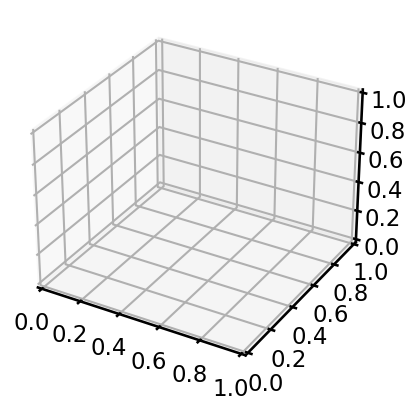

In [9]:
 
import numpy as np
import matplotlib.pyplot as plt
 
 
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(t.pos_x,t.pos_y,0)
# ax.scatter(show_tree(root).pos_x,show_tree(root).pos_y,1)
for i in t.edges:
    p1,p2 = i;
    index1=t.label_hash[p1];
    index2=t.label_hash[p2];
    
    x1=t.pos_x[index1];y1=t.pos_y[index1];
    x2=t.pos_x[index2];y2=t.pos_y[index2];
    ax.plot([x1,x2],[y1,y2],[0,0],color='black')
plt.show()

In [10]:
t

NameError: name 't' is not defined

In [11]:
x

NameError: name 'x' is not defined

In [12]:
t.pos_x_2

NameError: name 't' is not defined

In [13]:
import plotly.graph_objects as go
import numpy as np
s = 13
# Helix equation
x, y, z =t.pos_x,t.pos_y,[0 for i in t.pos_x]
x=np.array(x)
y=np.array(y)
layout = go.Layout(
    scene=dict(
        zaxis=dict(
            range=[0, 1]  # Set the desired z-axis range
        )
    ),
    
)
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,mode='markers',marker=dict(size=3))],layout=layout)
x, y, z =t.pos_x_2,t.pos_y_2,[0.5 for i in t.pos_x]
x=np.array(x)-s
y=np.array(y)

fig.add_trace(go.Scatter3d(x=x, y=y, z=z,mode='markers',marker=dict(size=3)))
for i in t.edges:
    p1,p2 = i;
    index1=t.label_hash[p1];
    index2=t.label_hash[p2];
    
    x1=t.pos_x[index1];y1=t.pos_y[index1];
    x2=t.pos_x[index2];y2=t.pos_y[index2];
    fig.add_trace(go.Scatter3d(x=[x1,x2], y=[y1,y2], z=[0,0],mode='lines',line=dict(
                    color="#333",
                    width=4,
                ),))
for i in t.edges_2:
    p1,p2 = i;
    index1=t.label_hash_2[p1];
    index2=t.label_hash_2[p2];
    
    x1=t.pos_x_2[index1]-s;y1=t.pos_y_2[index1];
    x2=t.pos_x_2[index2]-s;y2=t.pos_y_2[index2];
    fig.add_trace(go.Scatter3d(x=[x1,x2], y=[y1,y2], z=[0.5,0.5],mode='lines',line=dict(
                    color="#acd",
                    width=4,
                ),))
    for i in t.ans:
        p1,p2 = i;
        index1=t.label_hash[p1];
        index2=t.label_hash_2[p2];
        x1=t.pos_x[index1];y1=t.pos_y[index1];
        x2=t.pos_x_2[index2]-s;y2=t.pos_y_2[index2];
        fig.add_trace(go.Scatter3d(x=[x1,x2], y=[y1,y2], z=[0,0.5],mode='lines',line=dict(
                    color="#345681",
                    width=4,
                ),))
fig.update_layout(showlegend=False)
fig.update_layout(
    showlegend=False,
    xaxis=dict(visible=False),
    yaxis=dict(visible=False),
)
fig.show()

NameError: name 't' is not defined